In [43]:
# ======================================================================
# There are 5 questions in this test with increasing difficulty from 1-5
# Please note that the weight of the grade for the question is relative
# to its difficulty. So your Category 1 question will score much less
# than your Category 5 question.
# ======================================================================
#
# Computer Vision with CNNs
#
# For this task you will build a classifier for Rock-Paper-Scissors 
# based on the rps dataset.
#
# IMPORTANT: Your final layer should be as shown, do not change the
# provided code, or the tests may fail
#
# IMPORTANT: Images will be tested as 150x150 with 3 bytes of color depth
# So ensure that your input layer is designed accordingly, or the tests
# may fail. 
#
# NOTE THAT THIS IS UNLABELLED DATA. 
# You can use the ImageDataGenerator to automatically label it
# and we have provided some starter code.

import urllib.request
import zipfile
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D
from tensorflow.keras.callbacks import ModelCheckpoint

def solution_model():
    url = 'https://storage.googleapis.com/download.tensorflow.org/data/rps.zip'
    urllib.request.urlretrieve(url, 'rps.zip')
    local_zip = 'rps.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('./tmp/')
    zip_ref.close()

    
    TRAINING_DIR = "./tmp/rps/"
    VALID_DIR =  "./tmp/rps-test-set/"
    training_datagen = ImageDataGenerator(
    # YOUR CODE HERE
    rescale=1/255.,
    shear_range = 0.2, 
    zoom_range = 0.2, 
    horizontal_flip = True
    )

#     train_generator = # YOUR CODE HERE
    train_generator = training_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(150, 150),
        batch_size=32,
        class_mode = 'categorical'
    )
    valid_datagen = ImageDataGenerator(
        # YOUR CODE HERE
        rescale=1/255.
        )

    valid_generator = valid_datagen.flow_from_directory(
            VALID_DIR,
            target_size=(150, 150),
            batch_size=32,
            class_mode = 'categorical'
     )
    
#     print(train_generator.next())
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64,(3,3), input_shape=(150,150,3), activation='relu'), 
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),                                       

    # YOUR CODE HERE, BUT END WITH A 3 Neuron Dense, activated by softmax
        tf.keras.layers.Dense(3, activation='softmax')
    ])


    model.compile(loss='categorical_crossentropy', optimizer='adam', 
                 metrics=['acc'])
    checkpoint_path = "my_checkpoint_rps1.ckpt"
    checkpoint = ModelCheckpoint(filepath= checkpoint_path, save_weights_only=True,
                                save_best_only=True, monitor='val_loss', verbose=1)
    model.fit(train_generator, validation_data=(valid_generator), epochs=20
             ,callbacks=[checkpoint])
    model.load_weights(checkpoint_path)
    return model



# Note that you'll need to save your model as a .h5 like this
# This .h5 will be uploaded to the testing infrastructure
# and a score will be returned to you
if __name__ == '__main__':
    model = solution_model()
    model.save("cat3_rps1.h5")

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Epoch 1/20
79/79 [==============================] - ETA: 0s - loss: 0.7344 - acc: 0.6234
Epoch 00001: val_loss improved from inf to 0.26178, saving model to my_checkpoint_rps1.ckpt
79/79 [==============================] - 41s 520ms/step - loss: 0.7344 - acc: 0.6234 - val_loss: 0.2618 - val_acc: 0.8683
Epoch 2/20
79/79 [==============================] - ETA: 0s - loss: 0.1374 - acc: 0.9560
Epoch 00002: val_loss improved from 0.26178 to 0.19892, saving model to my_checkpoint_rps1.ckpt
79/79 [==============================] - 34s 433ms/step - loss: 0.1374 - acc: 0.9560 - val_loss: 0.1989 - val_acc: 0.8925
Epoch 3/20
79/79 [==============================] - ETA: 0s - loss: 0.0468 - acc: 0.9837
Epoch 00003: val_loss improved from 0.19892 to 0.15369, saving model to my_checkpoint_rps1.ckpt
79/79 [==============================] - 34s 435ms/step - loss: 0.0468 - acc: 0.9837 - val_loss: 0.1537 - val_acc: 0.9167


Found 2520 images belonging to 3 classes.


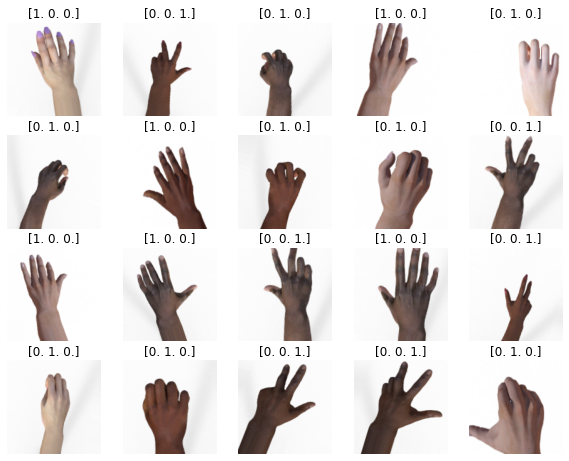

In [10]:
# 시각화 해보기
# ImageDataGenerator / Augumentation 후의 이미지 시각화 

from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import matplotlib.pyplot as plt 
import glob
import math 

TRAINING_DIR = "./tmp/rps/"
    
training_datagen = ImageDataGenerator(
    # YOUR CODE HERE
    rescale=1/255.,
    rotation_range=20, 
    width_shift_range=0.1,
    height_shift_range=0.1, 
    shear_range = 0.1,
    zoom_range = 0.2, 
    horizontal_flip = True
)
 
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode = 'categorical'
)

image, label = next(train_generator)

plt.figure(figsize=(10,10))
for n in range(20):
    plt.subplot(5,5,n+1)
    plt.imshow(image[n])
    plt.title(label[n])
    plt.axis('off')

In [44]:
###  train 데이터셋을 8:2로  train:valid로 나누기 
import os 
import glob 
import random 
import shutil 
import numpy as np 
ROOT_DIR = './tmp/'
TRAINING_DIR = "./tmp/rps/"


#폴더 없으면 만드는 함수 
def createfolder(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

#상위폴더 만들기 
createfolder(ROOT_DIR+'rps_train0')
createfolder(ROOT_DIR+'rps_valid0')

folders = ['paper', 'rock', 'scissors']

#하위폴더만들기 
for f in folders: 
    createfolder(ROOT_DIR+'rps_train0/'+f)
    createfolder(ROOT_DIR+'rps_valid0/'+f)

# 각 폴더에 파일 카피 (랜덤하게 뽑은 인덱스를 이용)
def copy_files(folder):
    files = glob.glob(TRAINING_DIR + folder + '/*.*')
    ratio = 0.2 
    rand_index = np.random.choice(len(files), int(len(files)*ratio), replace=False)

    for i, f in enumerate(files):
        fname = os.path.basename(f)
        if i in rand_index:
            print('{} is copying to train folder'.format(fname))
            shutil.copy2(os.path.join(TRAINING_DIR, folder, fname), os.path.join(ROOT_DIR, 'rps_train0', folder))
        else:
            print('{} is copying to valid folder'.format(fname))
            shutil.copy2(os.path.join(TRAINING_DIR, folder, fname),  os.path.join(ROOT_DIR,'rps_valid0', folder))

# 각 폴더마다 순회하며 카피 
for a in folders: 
    copy_files(a)

paper01-000.png is copying to valid folder
paper01-001.png is copying to valid folder
paper01-002.png is copying to valid folder
paper01-003.png is copying to valid folder
paper01-004.png is copying to valid folder
paper01-005.png is copying to train folder
paper01-006.png is copying to valid folder
paper01-007.png is copying to valid folder
paper01-008.png is copying to valid folder
paper01-009.png is copying to valid folder
paper01-010.png is copying to valid folder
paper01-011.png is copying to valid folder
paper01-012.png is copying to valid folder
paper01-013.png is copying to valid folder
paper01-014.png is copying to valid folder
paper01-015.png is copying to valid folder
paper01-016.png is copying to train folder
paper01-017.png is copying to valid folder
paper01-018.png is copying to valid folder
paper01-019.png is copying to valid folder
paper01-020.png is copying to train folder
paper01-021.png is copying to valid folder
paper01-022.png is copying to valid folder
paper01-023

paper03-064.png is copying to train folder
paper03-065.png is copying to valid folder
paper03-066.png is copying to valid folder
paper03-067.png is copying to valid folder
paper03-068.png is copying to valid folder
paper03-069.png is copying to valid folder
paper03-070.png is copying to valid folder
paper03-071.png is copying to valid folder
paper03-072.png is copying to valid folder
paper03-073.png is copying to valid folder
paper03-074.png is copying to valid folder
paper03-075.png is copying to valid folder
paper03-076.png is copying to valid folder
paper03-077.png is copying to valid folder
paper03-078.png is copying to valid folder
paper03-079.png is copying to valid folder
paper03-080.png is copying to valid folder
paper03-081.png is copying to valid folder
paper03-082.png is copying to valid folder
paper03-083.png is copying to valid folder
paper03-084.png is copying to valid folder
paper03-085.png is copying to valid folder
paper03-086.png is copying to valid folder
paper03-087

paper06-054.png is copying to train folder
paper06-055.png is copying to valid folder
paper06-056.png is copying to valid folder
paper06-057.png is copying to train folder
paper06-058.png is copying to valid folder
paper06-059.png is copying to valid folder
paper06-060.png is copying to valid folder
paper06-061.png is copying to valid folder
paper06-062.png is copying to valid folder
paper06-063.png is copying to valid folder
paper06-064.png is copying to valid folder
paper06-065.png is copying to valid folder
paper06-066.png is copying to valid folder
paper06-067.png is copying to train folder
paper06-068.png is copying to valid folder
paper06-069.png is copying to valid folder
paper06-070.png is copying to valid folder
paper06-071.png is copying to valid folder
paper06-072.png is copying to valid folder
paper06-073.png is copying to valid folder
paper06-074.png is copying to valid folder
paper06-075.png is copying to train folder
paper06-076.png is copying to valid folder
paper06-077

rock02-049.png is copying to valid folder
rock02-050.png is copying to valid folder
rock02-051.png is copying to valid folder
rock02-052.png is copying to train folder
rock02-053.png is copying to train folder
rock02-054.png is copying to valid folder
rock02-055.png is copying to valid folder
rock02-056.png is copying to valid folder
rock02-057.png is copying to train folder
rock02-058.png is copying to valid folder
rock02-059.png is copying to valid folder
rock02-060.png is copying to valid folder
rock02-061.png is copying to valid folder
rock02-062.png is copying to valid folder
rock02-063.png is copying to train folder
rock02-064.png is copying to valid folder
rock02-065.png is copying to valid folder
rock02-066.png is copying to train folder
rock02-067.png is copying to valid folder
rock02-068.png is copying to valid folder
rock02-069.png is copying to valid folder
rock02-070.png is copying to train folder
rock02-071.png is copying to train folder
rock02-072.png is copying to valid

rock06ck02-071.png is copying to train folder
rock06ck02-072.png is copying to valid folder
rock06ck02-073.png is copying to train folder
rock06ck02-074.png is copying to train folder
rock06ck02-075.png is copying to train folder
rock06ck02-076.png is copying to train folder
rock06ck02-077.png is copying to valid folder
rock06ck02-078.png is copying to valid folder
rock06ck02-079.png is copying to valid folder
rock06ck02-080.png is copying to valid folder
rock06ck02-081.png is copying to valid folder
rock06ck02-082.png is copying to valid folder
rock06ck02-083.png is copying to valid folder
rock06ck02-084.png is copying to valid folder
rock06ck02-085.png is copying to train folder
rock06ck02-086.png is copying to valid folder
rock06ck02-087.png is copying to valid folder
rock06ck02-088.png is copying to valid folder
rock06ck02-089.png is copying to valid folder
rock06ck02-090.png is copying to valid folder
rock06ck02-091.png is copying to valid folder
rock06ck02-092.png is copying to v

scissors02-057.png is copying to train folder
scissors02-058.png is copying to valid folder
scissors02-059.png is copying to valid folder
scissors02-060.png is copying to valid folder
scissors02-061.png is copying to train folder
scissors02-062.png is copying to valid folder
scissors02-063.png is copying to valid folder
scissors02-064.png is copying to valid folder
scissors02-065.png is copying to train folder
scissors02-066.png is copying to train folder
scissors02-067.png is copying to valid folder
scissors02-068.png is copying to train folder
scissors02-069.png is copying to valid folder
scissors02-070.png is copying to valid folder
scissors02-071.png is copying to train folder
scissors02-072.png is copying to valid folder
scissors02-073.png is copying to valid folder
scissors02-074.png is copying to valid folder
scissors02-075.png is copying to train folder
scissors02-076.png is copying to train folder
scissors02-077.png is copying to valid folder
scissors02-078.png is copying to v

testscissors01-052.png is copying to valid folder
testscissors01-053.png is copying to train folder
testscissors01-054.png is copying to valid folder
testscissors01-055.png is copying to valid folder
testscissors01-056.png is copying to valid folder
testscissors01-057.png is copying to valid folder
testscissors01-058.png is copying to valid folder
testscissors01-059.png is copying to valid folder
testscissors01-060.png is copying to valid folder
testscissors01-061.png is copying to valid folder
testscissors01-062.png is copying to valid folder
testscissors01-063.png is copying to valid folder
testscissors01-064.png is copying to train folder
testscissors01-065.png is copying to valid folder
testscissors01-066.png is copying to valid folder
testscissors01-067.png is copying to valid folder
testscissors01-068.png is copying to valid folder
testscissors01-069.png is copying to valid folder
testscissors01-070.png is copying to valid folder
testscissors01-071.png is copying to valid folder


In [47]:
### 다시풀기 

import urllib.request
import zipfile
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D
from tensorflow.keras.callbacks import ModelCheckpoint

def solution_model():
#     url = 'https://storage.googleapis.com/download.tensorflow.org/data/rps.zip'
#     urllib.request.urlretrieve(url, 'rps.zip')
#     local_zip = 'rps.zip'
#     zip_ref = zipfile.ZipFile(local_zip, 'r')
#     zip_ref.extractall('./tmp/')
#     zip_ref.close()

    
    TRAINING_DIR = "./tmp/rps_train0/"
    VALID_DIR =  "./tmp/rps_valid0/"
    training_datagen = ImageDataGenerator(
    # YOUR CODE HERE
    rescale=1/255.,
    shear_range = 0.2, 
    zoom_range = 0.2, 
    horizontal_flip = True
    )

#     train_generator = # YOUR CODE HERE
    train_generator = training_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(150, 150),
        batch_size=32,
        class_mode = 'categorical'
    )
    valid_datagen = ImageDataGenerator(
        # YOUR CODE HERE
        rescale=1/255.
        )

    valid_generator = valid_datagen.flow_from_directory(
            VALID_DIR,
            target_size=(150, 150),
            batch_size=32,
            class_mode = 'categorical'
     )
    
#     print(train_generator.next())
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64,(3,3), input_shape=(150,150,3), activation='relu'), 
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),                                       

    # YOUR CODE HERE, BUT END WITH A 3 Neuron Dense, activated by softmax
        tf.keras.layers.Dense(3, activation='softmax')
    ])


    model.compile(loss='categorical_crossentropy', optimizer='adam', 
                 metrics=['acc'])
    checkpoint_path = "my_checkpoint_rps1.ckpt"
    checkpoint = ModelCheckpoint(filepath= checkpoint_path, save_weights_only=True,
                                save_best_only=True, monitor='val_loss', verbose=1)
    model.fit(train_generator, validation_data=(valid_generator), epochs=20
             ,callbacks=[checkpoint])
    model.load_weights(checkpoint_path)
    return model



# Note that you'll need to save your model as a .h5 like this
# This .h5 will be uploaded to the testing infrastructure
# and a score will be returned to you
if __name__ == '__main__':
    model = solution_model()
    model.save("cat3_rps1.h5")

Found 504 images belonging to 3 classes.
Found 2016 images belonging to 3 classes.
Epoch 1/20
16/16 [==============================] - ETA: 0s - loss: 1.0972 - acc: 0.3750
Epoch 00001: val_loss improved from inf to 1.09145, saving model to my_checkpoint_rps1.ckpt
16/16 [==============================] - 19s 1s/step - loss: 1.0972 - acc: 0.3750 - val_loss: 1.0915 - val_acc: 0.3333
Epoch 2/20
16/16 [==============================] - ETA: 0s - loss: 1.0585 - acc: 0.4345
Epoch 00002: val_loss improved from 1.09145 to 0.93197, saving model to my_checkpoint_rps1.ckpt
16/16 [==============================] - 12s 781ms/step - loss: 1.0585 - acc: 0.4345 - val_loss: 0.9320 - val_acc: 0.5342
Epoch 3/20
16/16 [==============================] - ETA: 0s - loss: 0.8171 - acc: 0.6230
Epoch 00003: val_loss improved from 0.93197 to 0.74443, saving model to my_checkpoint_rps1.ckpt
16/16 [==============================] - 13s 835ms/step - loss: 0.8171 - acc: 0.6230 - val_loss: 0.7444 - val_acc: 0.7123
Epo